### 📚 Introduction
#### Here I am in the year 2912, facing an interstellar challenge that demands all my data science skills. The Spaceship Titanic, a cutting-edge passenger liner, was on its maiden voyage to three newly habitable exoplanets when disaster struck. While passing through Alpha Centauri, the ship collided with a spacetime anomaly hidden within a dust cloud. As a result, almost half of the passengers were transported to an alternate dimension, just like the Titanic from centuries ago.
#### Now, I’m tasked with analyzing the spaceship's damaged computer records to predict which passengers were lost to the anomaly. The goal is to assist the rescue teams in recovering those passengers and changing history. It’s a big challenge, but I’m ready to use everything I’ve got to make these predictions and hopefully save the day.

#### Key Features

1. **PassengerId**: A unique identifier for each passenger. The format is `gggg_pp`, where `gggg` represents the group the passenger is traveling with and `pp` is their number within the group. Group members are often family, but not always.

2. **HomePlanet**: The planet from which the passenger departed, typically their permanent place of residence.

3. **CryoSleep**: Indicates if the passenger opted for suspended animation for the duration of the voyage. Passengers in cryosleep remain confined to their cabins.

4. **Cabin**: The cabin number where the passenger is staying, formatted as `deck/num/side`. The side can be either `P` (Port) or `S` (Starboard).

5. **Destination**: The planet where the passenger will be debarking from the spaceship.

6. **Age**: The age of the passenger.

7. **VIP**: Indicates whether the passenger has paid for VIP service during the voyage.

8. **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: The amounts billed by the passenger for each of the spaceship's luxury amenities.

9. **Name**: The full name of the passenger (first and last names).

10. **Transported**: The target variable indicating whether the passenger was transported to another dimension. This is the column you're trying to predict.


In [90]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 📊 Dataset Overview

In [91]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [92]:
df.shape 

(8693, 14)

In [93]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [95]:
df.PassengerId.unique()

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

In [96]:
df.PassengerId.nunique()

8693

In [97]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [98]:
df.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [99]:
df.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [100]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [101]:
df.VIP.unique()

array([False, True, nan], dtype=object)

In [102]:
df.Name.unique()

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      dtype=object)

In [103]:
df.Transported.value_counts(normalize=True) 
# by looking at the value counts of the target variable, we can see that the dataset is almost balanced. so we can use any classification algorithm to train the model.

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\2018034694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transported', data=df, palette='Set2')


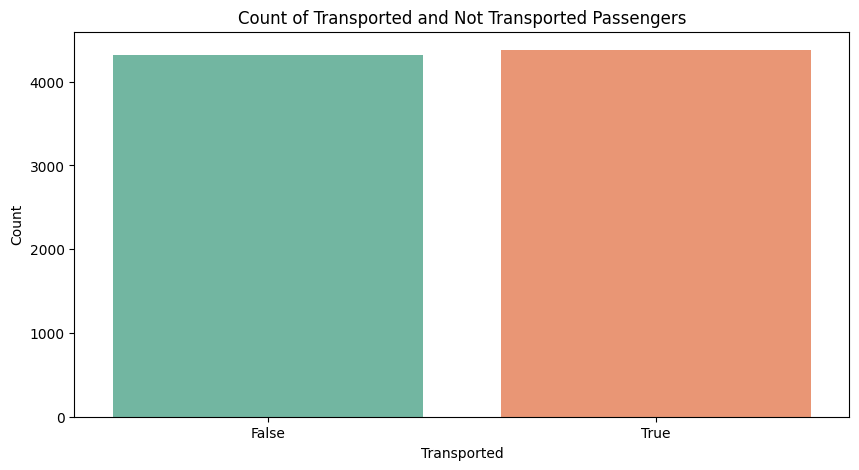

In [104]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Transported', data=df, palette='Set2')
plt.title('Count of Transported and Not Transported Passengers')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show() 


### 🔍 Exploratory Data Analysis (EDA)

In [105]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [106]:
df.RoomService.describe() 

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

### 🧹 Data Cleaning

In [107]:
# function to draw the histplot for each feature 
def feature_histplot(df, col, color): 
    plt.figure(figsize=(10,6)) 
    sns.histplot(df[col], bins=20, kde=True, color=color)
    plt.title(f'{col} Distribution') 
    plt.xlabel(col) 
    plt.ylabel('Count') 
    plt.show()  

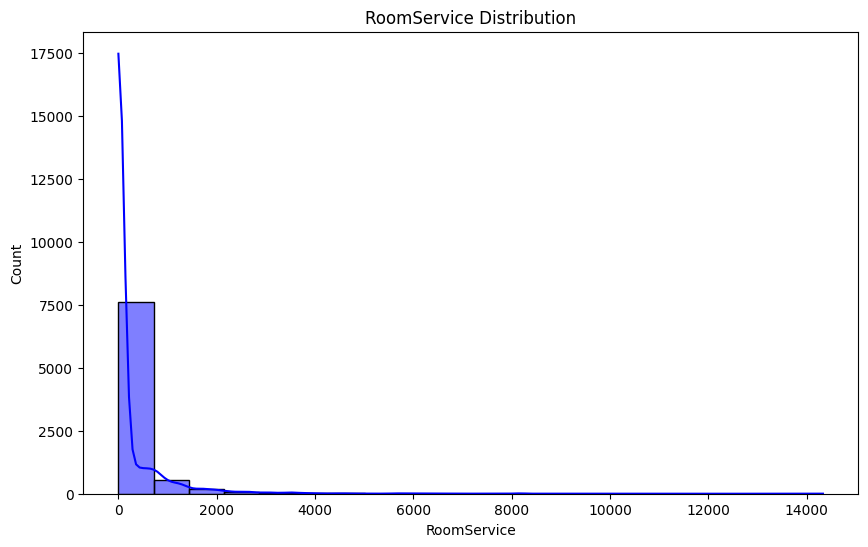

In [108]:
df2 = df 
feature_histplot(df2, 'RoomService', 'blue')

In [109]:
df.RoomService.value_counts(normalize=True)

RoomService
0.0       0.655193
1.0       0.013745
2.0       0.009281
3.0       0.007166
4.0       0.005522
            ...   
6899.0    0.000117
1954.0    0.000117
3146.0    0.000117
1297.0    0.000117
2555.0    0.000117
Name: proportion, Length: 1273, dtype: float64

In [110]:
df2.RoomService = df2.RoomService.fillna(0)   
# I assume that nan values are the people who didn't spend on the room service   
# also we can do the same for the other spaceship's luxury amentities null values too

In [111]:
df2.FoodCourt.value_counts(normalize=True) 

FoodCourt
0.0        0.641128
1.0        0.013631
2.0        0.008813
3.0        0.006228
4.0        0.006228
             ...   
1585.0     0.000118
749.0      0.000118
1961.0     0.000118
522.0      0.000118
14773.0    0.000118
Name: proportion, Length: 1507, dtype: float64

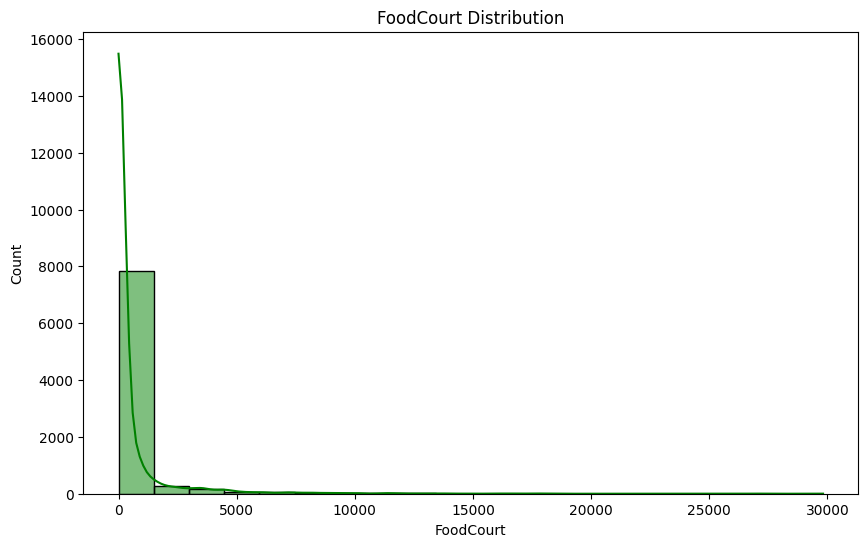

In [112]:
feature_histplot(df2, 'FoodCourt', 'green') 
# by looking at these values there are lot of passengers didn't spent money on food court at all 

In [113]:
df.FoodCourt = df.FoodCourt.fillna(0) 
# we can assume that null values of food court was there because those passengers didnt use the food court 

In [114]:
df2.ShoppingMall.value_counts(normalize=True) 
# by looking at these values there are lot of people who never used the shopping mall

ShoppingMall
0.0        0.658456
1.0        0.018032
2.0        0.009428
3.0        0.006953
4.0        0.005303
             ...   
563.0      0.000118
23492.0    0.000118
816.0      0.000118
1970.0     0.000118
204.0      0.000118
Name: proportion, Length: 1115, dtype: float64

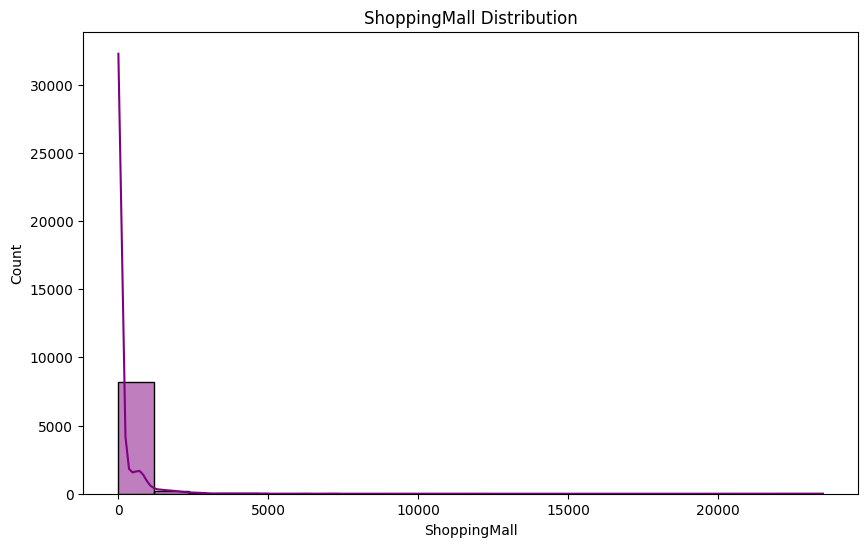

In [115]:
feature_histplot(df2, 'ShoppingMall', 'purple') 

# by loooking at this data distribution we can assume that there are lot of passengers didn't use shopping mall at all 

In [116]:
df2.ShoppingMall = df2.ShoppingMall.fillna(0)
# we can fill the shopping mall null values with 0 because we can assume that they can never use the shopping mall

In [117]:
df2.Spa.value_counts(normalize=True) 

# this is also the same like above ones. so we can replace the null values with 0

Spa
0.0       0.625617
1.0       0.017156
2.0       0.012338
5.0       0.006228
3.0       0.006228
            ...   
780.0     0.000118
800.0     0.000118
1239.0    0.000118
3761.0    0.000118
5025.0    0.000118
Name: proportion, Length: 1327, dtype: float64

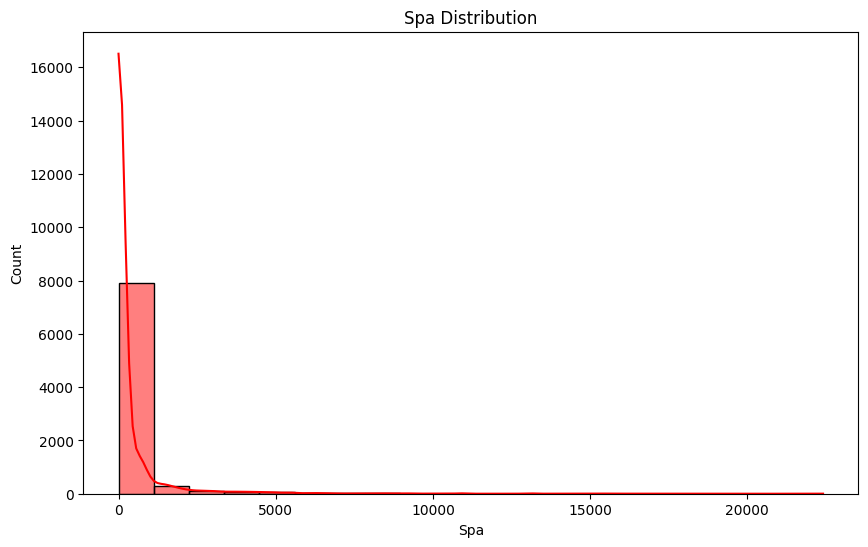

In [118]:
feature_histplot(df2, 'Spa', 'red') 
# by looking at this histplot we can find the same behaviour like the before ones

In [119]:
# so we can fill the nan values with 0 
df2.Spa = df2.Spa.fillna(0) 

In [120]:
df2.VRDeck.value_counts(normalize=True) 
# this is also the same as the before ones. let's look at the histplot also 

VRDeck
0.0       0.646091
1.0       0.016343
2.0       0.008230
3.0       0.006584
5.0       0.005996
            ...   
471.0     0.000118
2064.0    0.000118
802.0     0.000118
1556.0    0.000118
5057.0    0.000118
Name: proportion, Length: 1306, dtype: float64

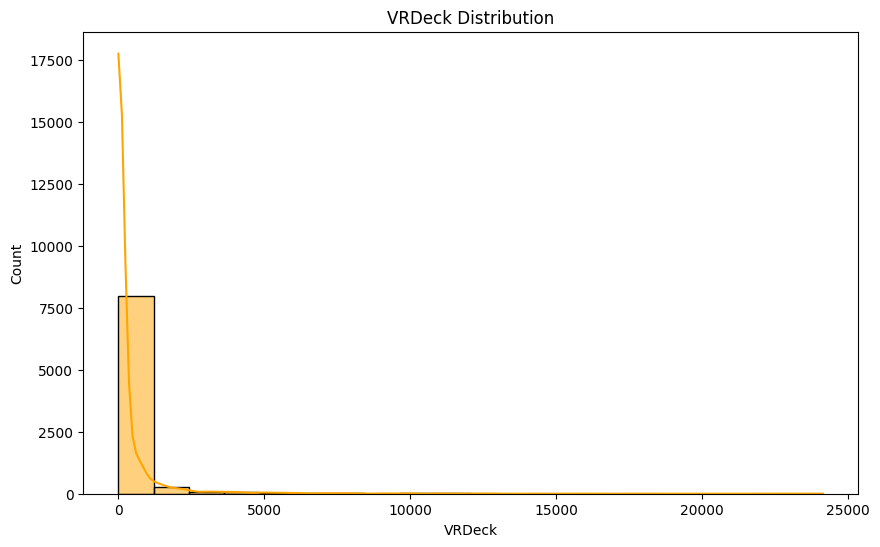

In [121]:
feature_histplot(df2, 'VRDeck', 'orange') 

# so we can assume that nan values are the ones who didn't spent on the VRDeck so we can fill those values with 0 

In [122]:
df2.VRDeck = df2.VRDeck.fillna(0) 

In [123]:
df2.isnull().sum()  

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [124]:
df2.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [125]:
df2.CryoSleep.value_counts(normalize=True) 
# let's assume that the nan values are the values with no cryosleep so we can change those values to False

CryoSleep
False    0.641694
True     0.358306
Name: proportion, dtype: float64

In [126]:
df2.CryoSleep = df2.CryoSleep.fillna(False) 

C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\1189206066.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.CryoSleep = df2.CryoSleep.fillna(False)


In [127]:
df2.VIP.value_counts(normalize=True)  
# this VIP feature is very biased so it may give us bias values. so we can ignore it when making the model. 

VIP
False    0.976561
True     0.023439
Name: proportion, dtype: float64

In [128]:
# I assume that the nan values of the VIP column are the passengers with no VIP access so let's fill the nan values False 
df2.VIP = df2.VIP.fillna(False) 

C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\3004218586.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.VIP = df2.VIP.fillna(False)


In [129]:
df.shape 

(8693, 14)

In [130]:
# df2 = df.dropna()
# df2.isnull().sum()
df3 = df2.dropna() 
df3.shape 

(7770, 14)

In [131]:
df2.shape 

(8693, 14)

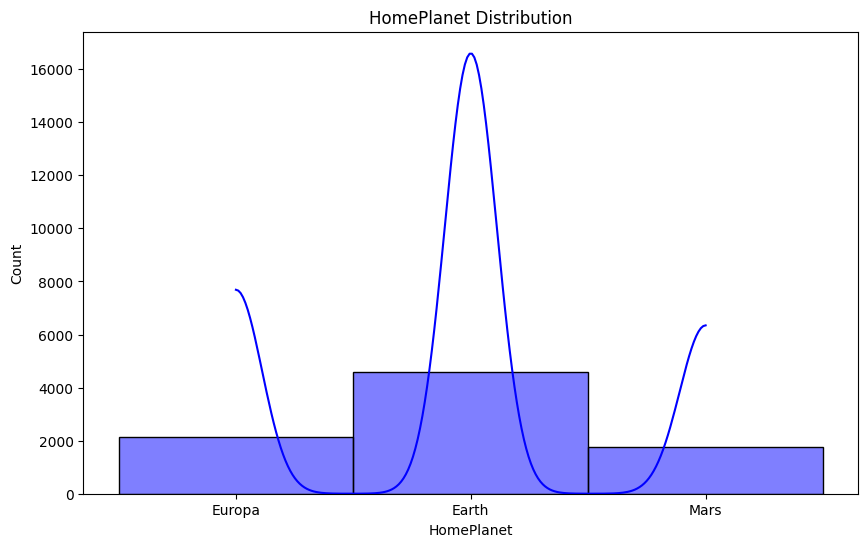

In [132]:
feature_histplot(df2, 'HomePlanet', 'blue') 

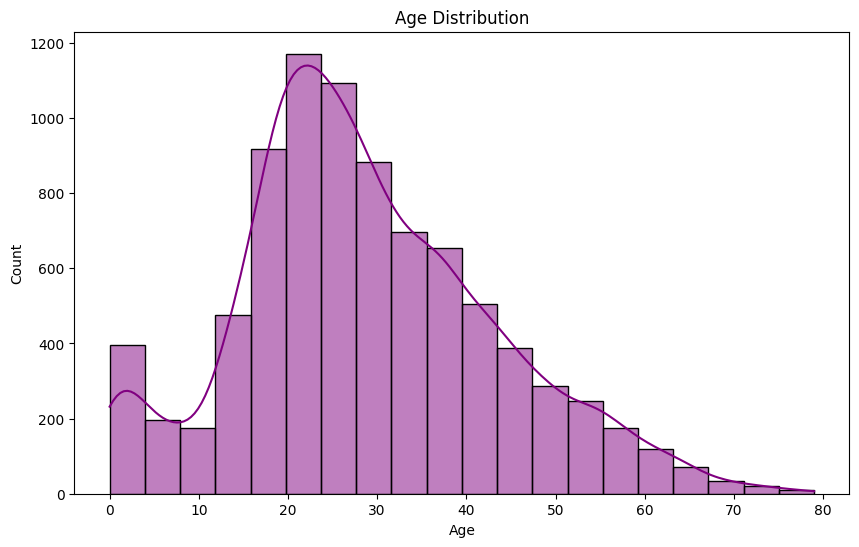

In [133]:
feature_histplot(df2, 'Age', 'purple') 

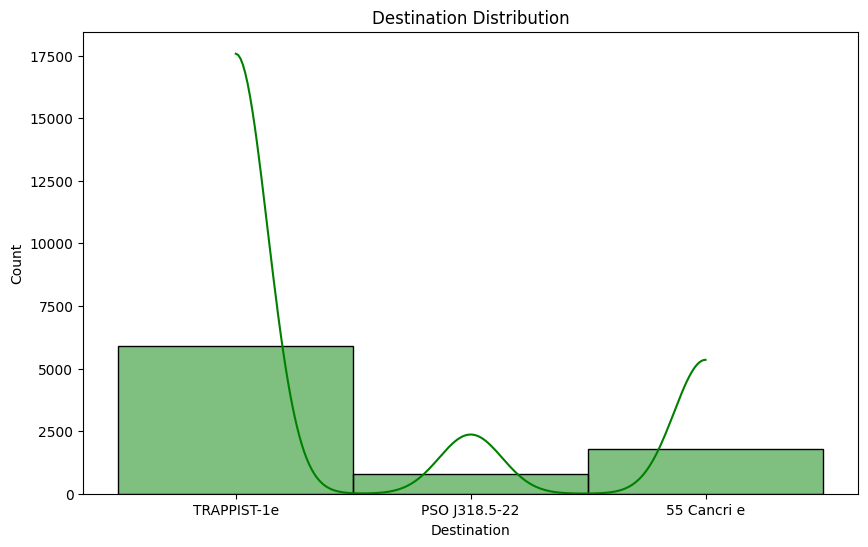

In [134]:
feature_histplot(df2, 'Destination', 'green')

Text(0.5, 0.98, 'Pairplot of features coloured by Transported')

<Figure size 2000x1500 with 0 Axes>

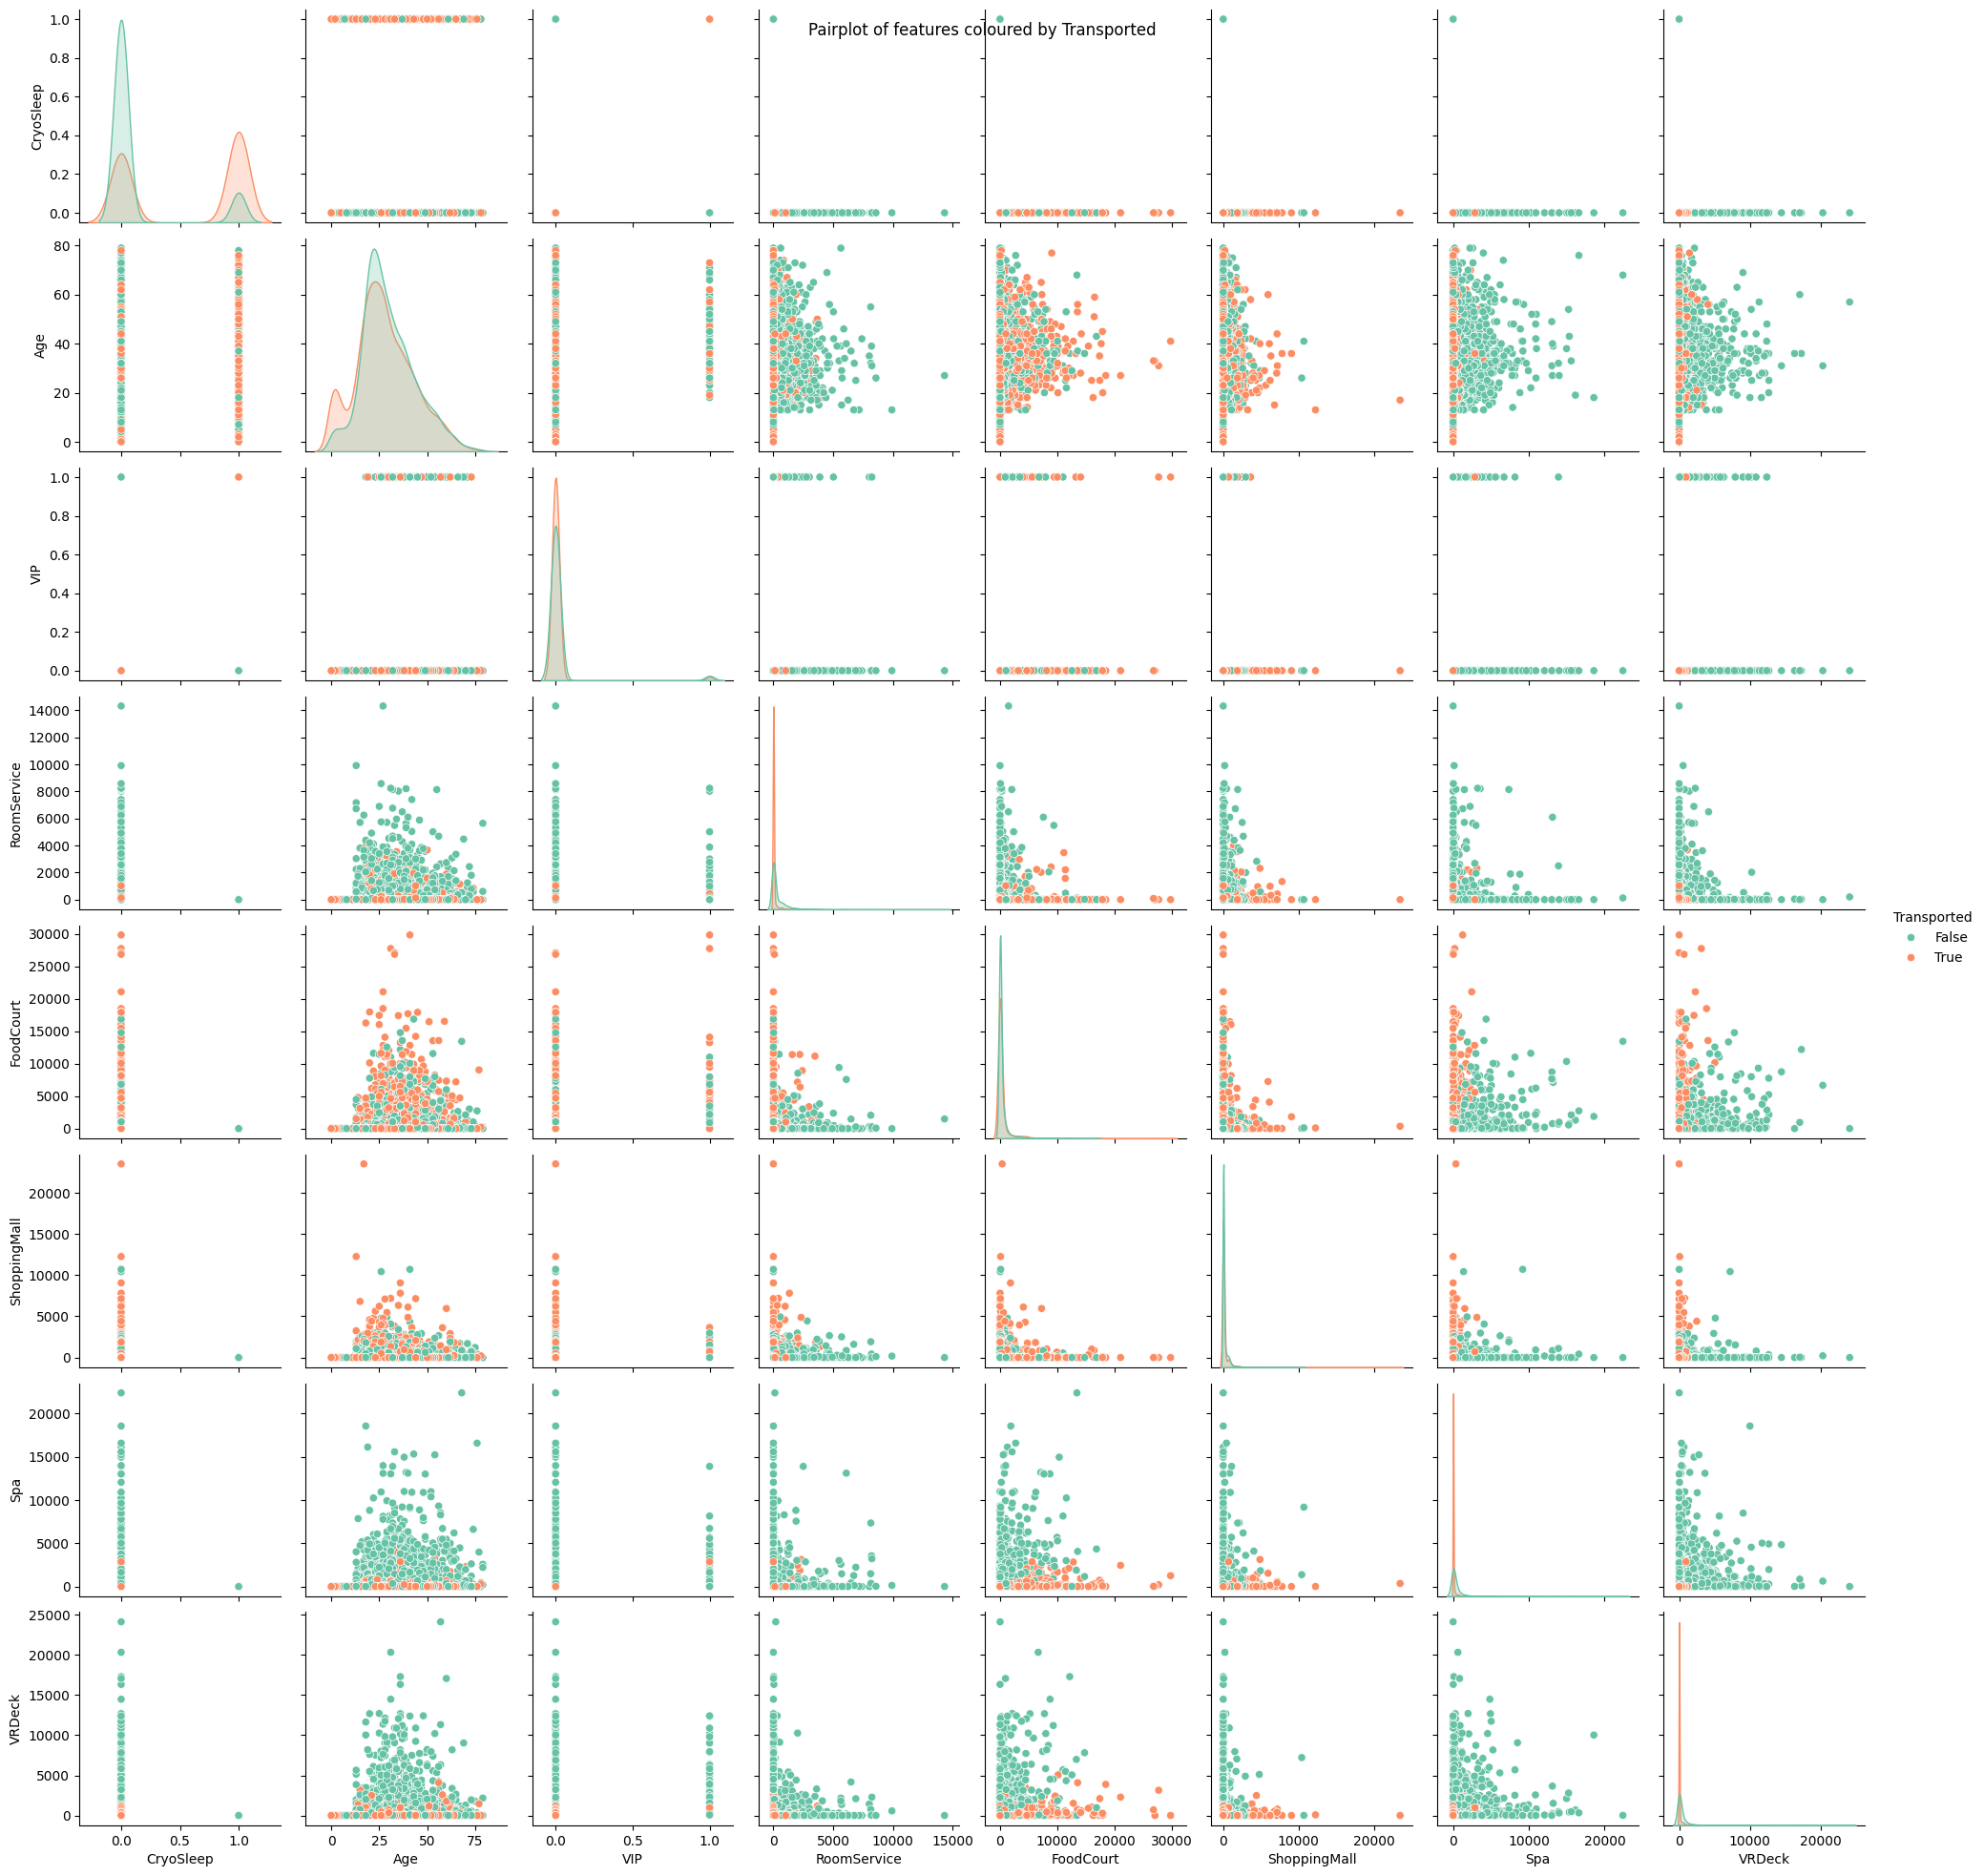

In [135]:
plt.figure(figsize=(20,15)) 
sns.pairplot(df, hue='Transported', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of features coloured by Transported') 

In [136]:
df3.shape 

(7770, 14)

In [137]:
df3.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


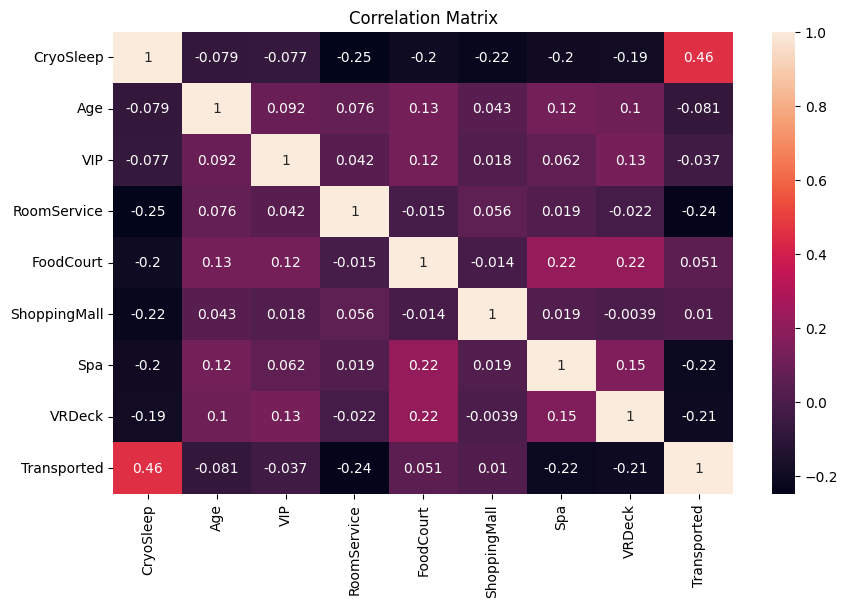

In [138]:
corr = df3.corr(numeric_only=True)  
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True) 
plt.title('Correlation Matrix')
plt.show() 


### 🔧 Feature Engineering

In [139]:
df3['TotalSpent'] = (df3['RoomService'] + df3['FoodCourt'] + df3['ShoppingMall'] + df3['Spa'] + df3['VRDeck'])
df3.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\2046349808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotalSpent'] = (df3['RoomService'] + df3['FoodCourt'] + df3['ShoppingMall'] + df3['Spa'] + df3['VRDeck'])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [140]:
df3['TotalServiceSpent'] = df3['RoomService'] + df3['FoodCourt']
df3.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\1100149368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotalServiceSpent'] = df3['RoomService'] + df3['FoodCourt']


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,TotalServiceSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,118.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3619.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,1283.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,373.0


In [141]:
def service_use(df, col): 
    df[f'{col}_used'] = df[col].apply(lambda x: 1 if x > 0 else 0)


In [142]:
columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in columns: 
    service_use(df3, col) 

df3.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\3631788745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_used'] = df[col].apply(lambda x: 1 if x > 0 else 0)
C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\3631788745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_used'] = df[col].apply(lambda x: 1 if x > 0 else 0)
C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\3631788745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,TotalSpent,TotalServiceSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0.0,0.0,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,736.0,118.0,1,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,10383.0,3619.0,1,1,0,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,5176.0,1283.0,0,1,1,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,1091.0,373.0,1,1,1,1,1


In [143]:
df4 = df3.drop(columns, axis=1)
df4.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalSpent,TotalServiceSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,0.0,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,118.0,1,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,3619.0,1,1,0,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,1283.0,0,1,1,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,373.0,1,1,1,1,1


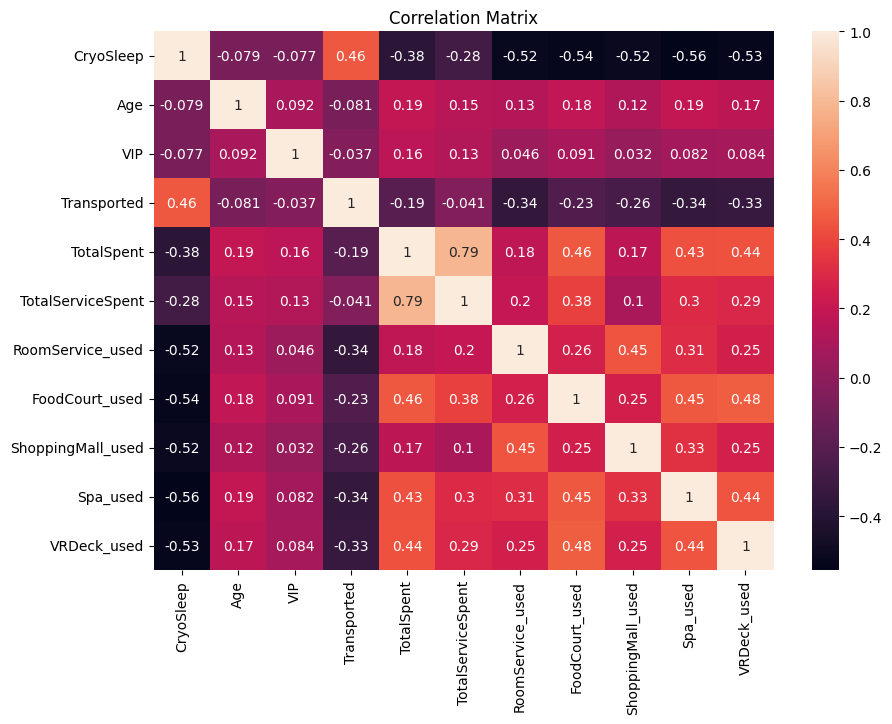

In [144]:
corr = df4.corr(numeric_only=True)  
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()  

In [145]:
df4.VIP.value_counts(normalize=True) 
# because VIP feature's bias, we can ignore it in the prediction 

VIP
False    0.976577
True     0.023423
Name: proportion, dtype: float64

In [146]:
df4['IsMinor'] = df.Age.apply(lambda x: 1 if x < 18 else 0) 
df4.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalSpent,TotalServiceSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,0.0,0,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,118.0,1,1,1,1,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,3619.0,1,1,0,1,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,1283.0,0,1,1,1,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,373.0,1,1,1,1,1,1


In [147]:
df4['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 7770, dtype: object

In [164]:
# Initialize empty columns for PassengerGroup and PassengerNumber
df4['PassengerGroup'] = None
df4['PassengerNumber'] = None

# Iterate over the rows of the DataFrame
for index, passenger_id in df4['PassengerId'].items():
    x = passenger_id.split('_')
    if len(x) == 2:
        df4.at[index, 'PassengerGroup'] = x[0]
        df4.at[index, 'PassengerNumber'] = x[1]

df4.head()
    

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalSpent,TotalServiceSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,PassengerGroup,PassengerNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,0.0,0,0,0,0,0,0,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,118.0,1,1,1,1,1,0,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,3619.0,1,1,0,1,1,0,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,1283.0,0,1,1,1,1,0,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,373.0,1,1,1,1,1,1,0004,01


In [165]:
df4.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        7770 non-null   object 
 1   HomePlanet         7770 non-null   object 
 2   CryoSleep          7770 non-null   bool   
 3   Cabin              7770 non-null   object 
 4   Destination        7770 non-null   object 
 5   Age                7770 non-null   float64
 6   VIP                7770 non-null   bool   
 7   Name               7770 non-null   object 
 8   Transported        7770 non-null   bool   
 9   TotalSpent         7770 non-null   float64
 10  TotalServiceSpent  7770 non-null   float64
 11  RoomService_used   7770 non-null   int64  
 12  FoodCourt_used     7770 non-null   int64  
 13  ShoppingMall_used  7770 non-null   int64  
 14  Spa_used           7770 non-null   int64  
 15  VRDeck_used        7770 non-null   int64  
 16  IsMinor            7770 non-n

In [169]:
# Convert PassengerGroup and PassengerNumber columns to integers
df4['PassengerGroup'] = df4['PassengerGroup'].astype(int)
df4['PassengerNumber'] = df4['PassengerNumber'].astype(int)

df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        7770 non-null   object 
 1   HomePlanet         7770 non-null   object 
 2   CryoSleep          7770 non-null   bool   
 3   Cabin              7770 non-null   object 
 4   Destination        7770 non-null   object 
 5   Age                7770 non-null   float64
 6   VIP                7770 non-null   bool   
 7   Name               7770 non-null   object 
 8   Transported        7770 non-null   bool   
 9   TotalSpent         7770 non-null   float64
 10  TotalServiceSpent  7770 non-null   float64
 11  RoomService_used   7770 non-null   int64  
 12  FoodCourt_used     7770 non-null   int64  
 13  ShoppingMall_used  7770 non-null   int64  
 14  Spa_used           7770 non-null   int64  
 15  VRDeck_used        7770 non-null   int64  
 16  IsMinor            7770 non-n

In [175]:
df4.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalSpent,TotalServiceSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,PassengerGroup,PassengerNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,0.0,0,0,0,0,0,0,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,118.0,1,1,1,1,1,0,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,3619.0,1,1,0,1,1,0,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,1283.0,0,1,1,1,1,0,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,373.0,1,1,1,1,1,1,4,1


In [176]:
df4.tail(10) 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalSpent,TotalServiceSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,PassengerGroup,PassengerNumber
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,Ireene Simson,True,992.0,482.0,1,1,1,0,0,0,9272,1
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,Gordo Simson,False,775.0,89.0,1,1,1,1,1,0,9272,2
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,Polaton Conable,True,0.0,0.0,0,0,0,0,0,1,9275,1
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,Diram Conable,False,1231.0,1147.0,1,1,0,1,1,0,9275,2
8687,9275_03,Europa,False,A/97/P,TRAPPIST-1e,30.0,False,Atlasym Conable,True,3540.0,3208.0,0,1,0,1,1,0,9275,3
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,Gravior Noxnuther,False,8536.0,6819.0,0,1,0,1,1,0,9276,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,Kurta Mondalley,False,0.0,0.0,0,0,0,0,0,0,9278,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,Fayey Connon,True,1873.0,0.0,0,0,1,1,0,0,9279,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,Celeon Hontichre,False,4637.0,1049.0,0,1,0,1,1,0,9280,1
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,Propsh Hontichre,True,4826.0,4814.0,1,1,0,0,1,0,9280,2


In [179]:
group_sizes = df4['PassengerGroup'].value_counts()
group_sizes  

df4['GroupSize'] = df4['PassengerGroup'].map(group_sizes) 
df4.head() 

df4['IsAlone'] = df4['GroupSize'].apply(lambda x: 1 if x == 1 else 0) 

df4.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalSpent,...,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,PassengerGroup,PassengerNumber,GroupSize,IsAlone
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,...,0,0,0,0,0,0,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,...,1,1,1,1,1,0,2,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,...,1,1,0,1,1,0,3,1,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,...,0,1,1,1,1,0,3,2,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,...,1,1,1,1,1,1,4,1,1,1


In [187]:
df4['IsFirstPassenger'] = df4['PassengerNumber'].apply(lambda x: 1 if x == 1 else 0)

df4.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalSpent,...,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,PassengerGroup,PassengerNumber,GroupSize,IsAlone,IsFirstPassenger
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,...,0,0,0,0,0,1,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,...,1,1,1,1,0,2,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,...,1,0,1,1,0,3,1,2,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,...,1,1,1,1,0,3,2,2,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,...,1,1,1,1,1,4,1,1,1,1


In [186]:
df4.drop('IsLastPassenger', axis='columns', inplace=True) 

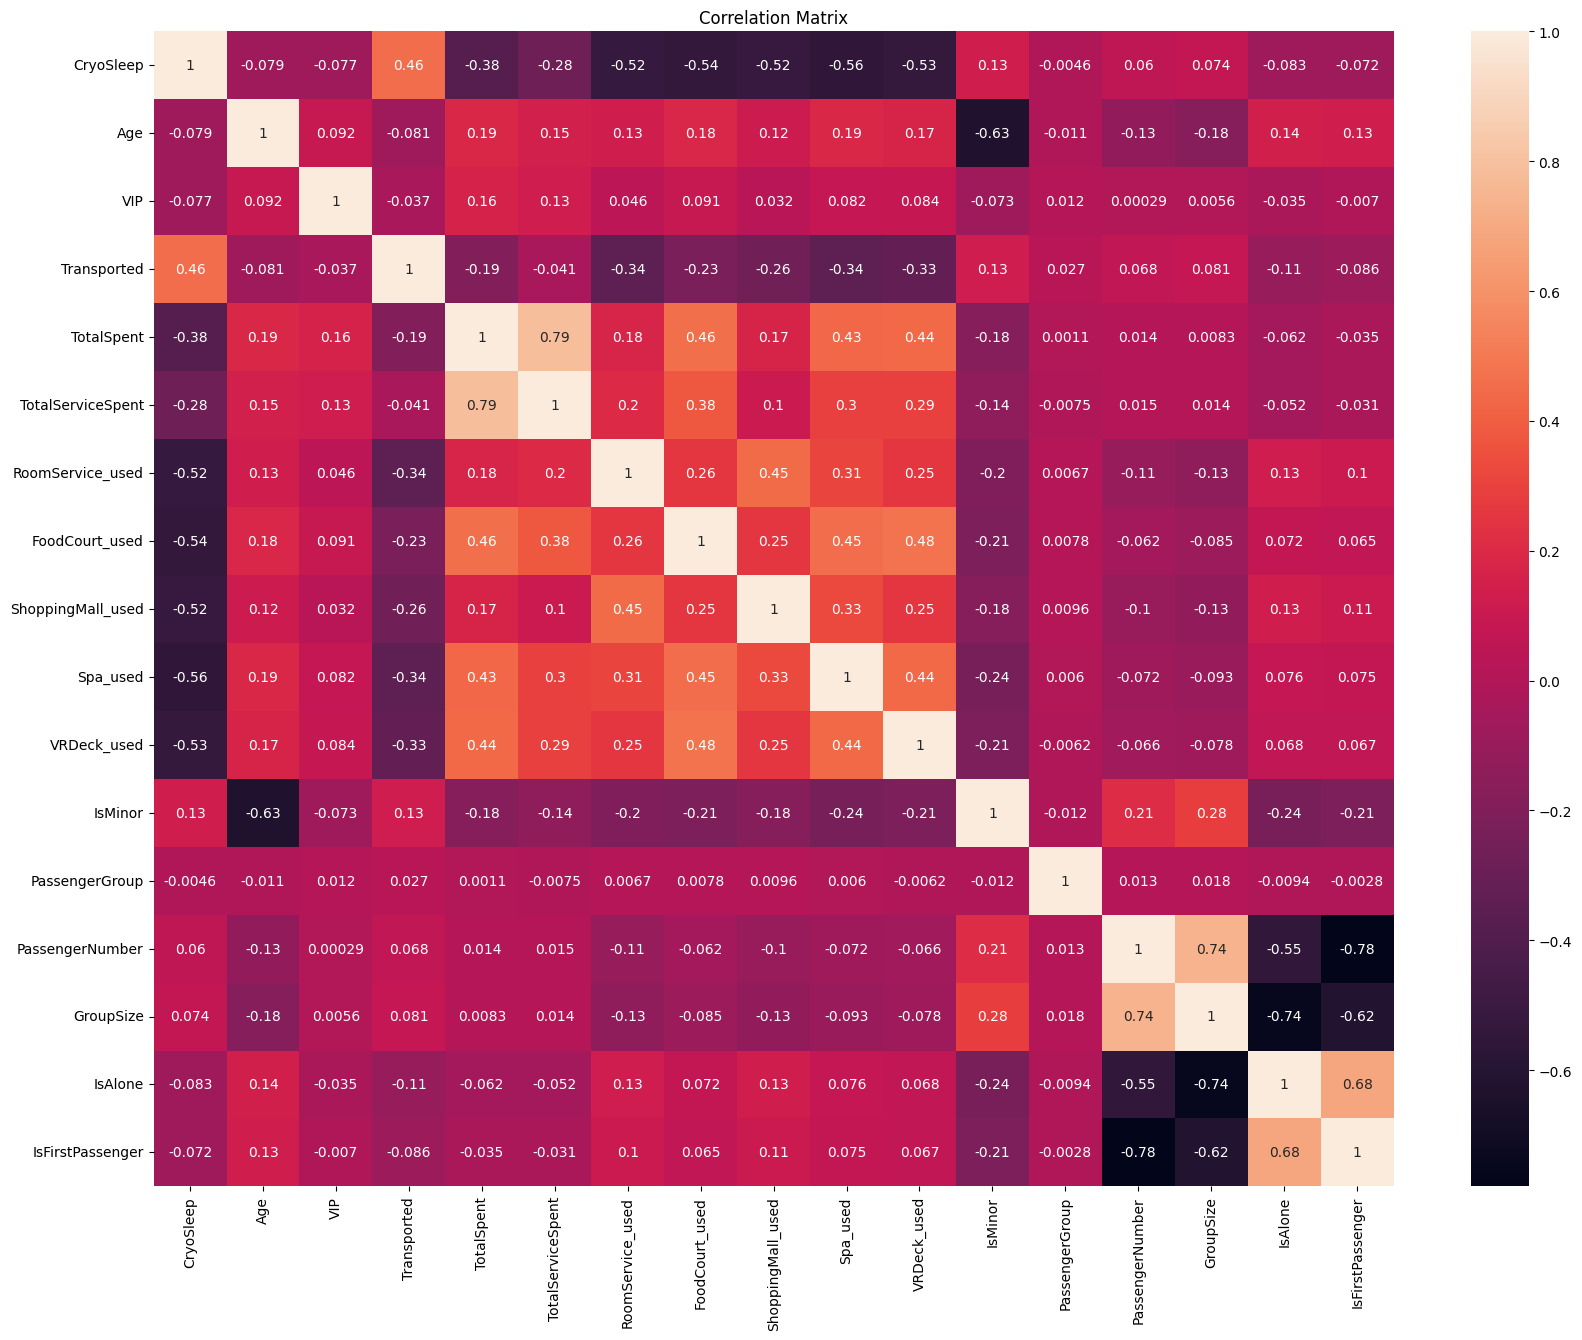

In [188]:
plt.figure(figsize=(20,15)) 
corr = df4.corr(numeric_only=True)  
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix') 
plt.show() 

In [191]:
columns = ['VIP', 'Age', 'TotalServiceSpent', 'PassengerGroup', 'PassengerNumber', 'IsFirstPassenger'] 
df5 = df4.drop(columns, axis=1) 
df5.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Name,Transported,TotalSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,GroupSize,IsAlone
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,Maham Ofracculy,False,0.0,0,0,0,0,0,0,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,Juanna Vines,True,736.0,1,1,1,1,1,0,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,Altark Susent,False,10383.0,1,1,0,1,1,0,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,Solam Susent,False,5176.0,0,1,1,1,1,0,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,Willy Santantines,True,1091.0,1,1,1,1,1,1,1,1


In [ ]:
df5.Cabin.value_counts() 


Cabin
G/734/S     8
G/1368/P    7
E/13/S      7
F/1411/P    7
B/82/S      7
           ..
F/175/S     1
A/98/P      1
G/1499/S    1
G/1500/S    1
F/0/S       1
Name: count, Length: 6087, dtype: int64

In [200]:
df5.Cabin.nunique() 

6087

In [204]:
# Initialize empty columns for CabinDeck, CabinNumber, and CabinSide
df5['CabinDeck'] = None
df5['CabinNumber'] = None
df5['CabinSide'] = None

# Iterate over the rows of the DataFrame
for index, cabin in df5['Cabin'].items():  
    x = cabin.split('/')
    
    if len(x) == 3: 
        df5.at[index, 'CabinDeck'] = x[0]
        df5.at[index, 'CabinNumber'] = x[1]
        df5.at[index, 'CabinSide'] = x[2]

In [205]:
df5.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Name,Transported,TotalSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,GroupSize,IsAlone,CabinDeck,CabinNumber,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,Maham Ofracculy,False,0.0,0,0,0,0,0,0,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,Juanna Vines,True,736.0,1,1,1,1,1,0,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,Altark Susent,False,10383.0,1,1,0,1,1,0,2,0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,Solam Susent,False,5176.0,0,1,1,1,1,0,2,0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,Willy Santantines,True,1091.0,1,1,1,1,1,1,1,1,F,1,S


In [206]:
df5.CabinDeck.unique() 

array(['B', 'F', 'A', 'G', 'E', 'C', 'D', 'T'], dtype=object)

In [208]:
df5.CabinNumber.nunique() 

1793

In [209]:
df5.CabinSide.unique() 

array(['P', 'S'], dtype=object)

In [212]:
df5.CabinSide = df5.CabinSide.replace({'P':1, 'S':0})
df5.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_26112\2369458636.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5.CabinSide = df5.CabinSide.replace({'P':1, 'S':0})


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Name,Transported,TotalSpent,RoomService_used,FoodCourt_used,ShoppingMall_used,Spa_used,VRDeck_used,IsMinor,GroupSize,IsAlone,CabinDeck,CabinNumber,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,Maham Ofracculy,False,0.0,0,0,0,0,0,0,1,1,B,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,Juanna Vines,True,736.0,1,1,1,1,1,0,1,1,F,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,Altark Susent,False,10383.0,1,1,0,1,1,0,2,0,A,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,Solam Susent,False,5176.0,0,1,1,1,1,0,2,0,A,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,Willy Santantines,True,1091.0,1,1,1,1,1,1,1,1,F,1,0


In [215]:
df5.CabinNumber = df5.CabinNumber.astype(int) 
df5.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        7770 non-null   object 
 1   HomePlanet         7770 non-null   object 
 2   CryoSleep          7770 non-null   bool   
 3   Cabin              7770 non-null   object 
 4   Destination        7770 non-null   object 
 5   Name               7770 non-null   object 
 6   Transported        7770 non-null   bool   
 7   TotalSpent         7770 non-null   float64
 8   RoomService_used   7770 non-null   int64  
 9   FoodCourt_used     7770 non-null   int64  
 10  ShoppingMall_used  7770 non-null   int64  
 11  Spa_used           7770 non-null   int64  
 12  VRDeck_used        7770 non-null   int64  
 13  IsMinor            7770 non-null   int64  
 14  GroupSize          7770 non-null   int64  
 15  IsAlone            7770 non-null   int64  
 16  CabinDeck          7770 non-n

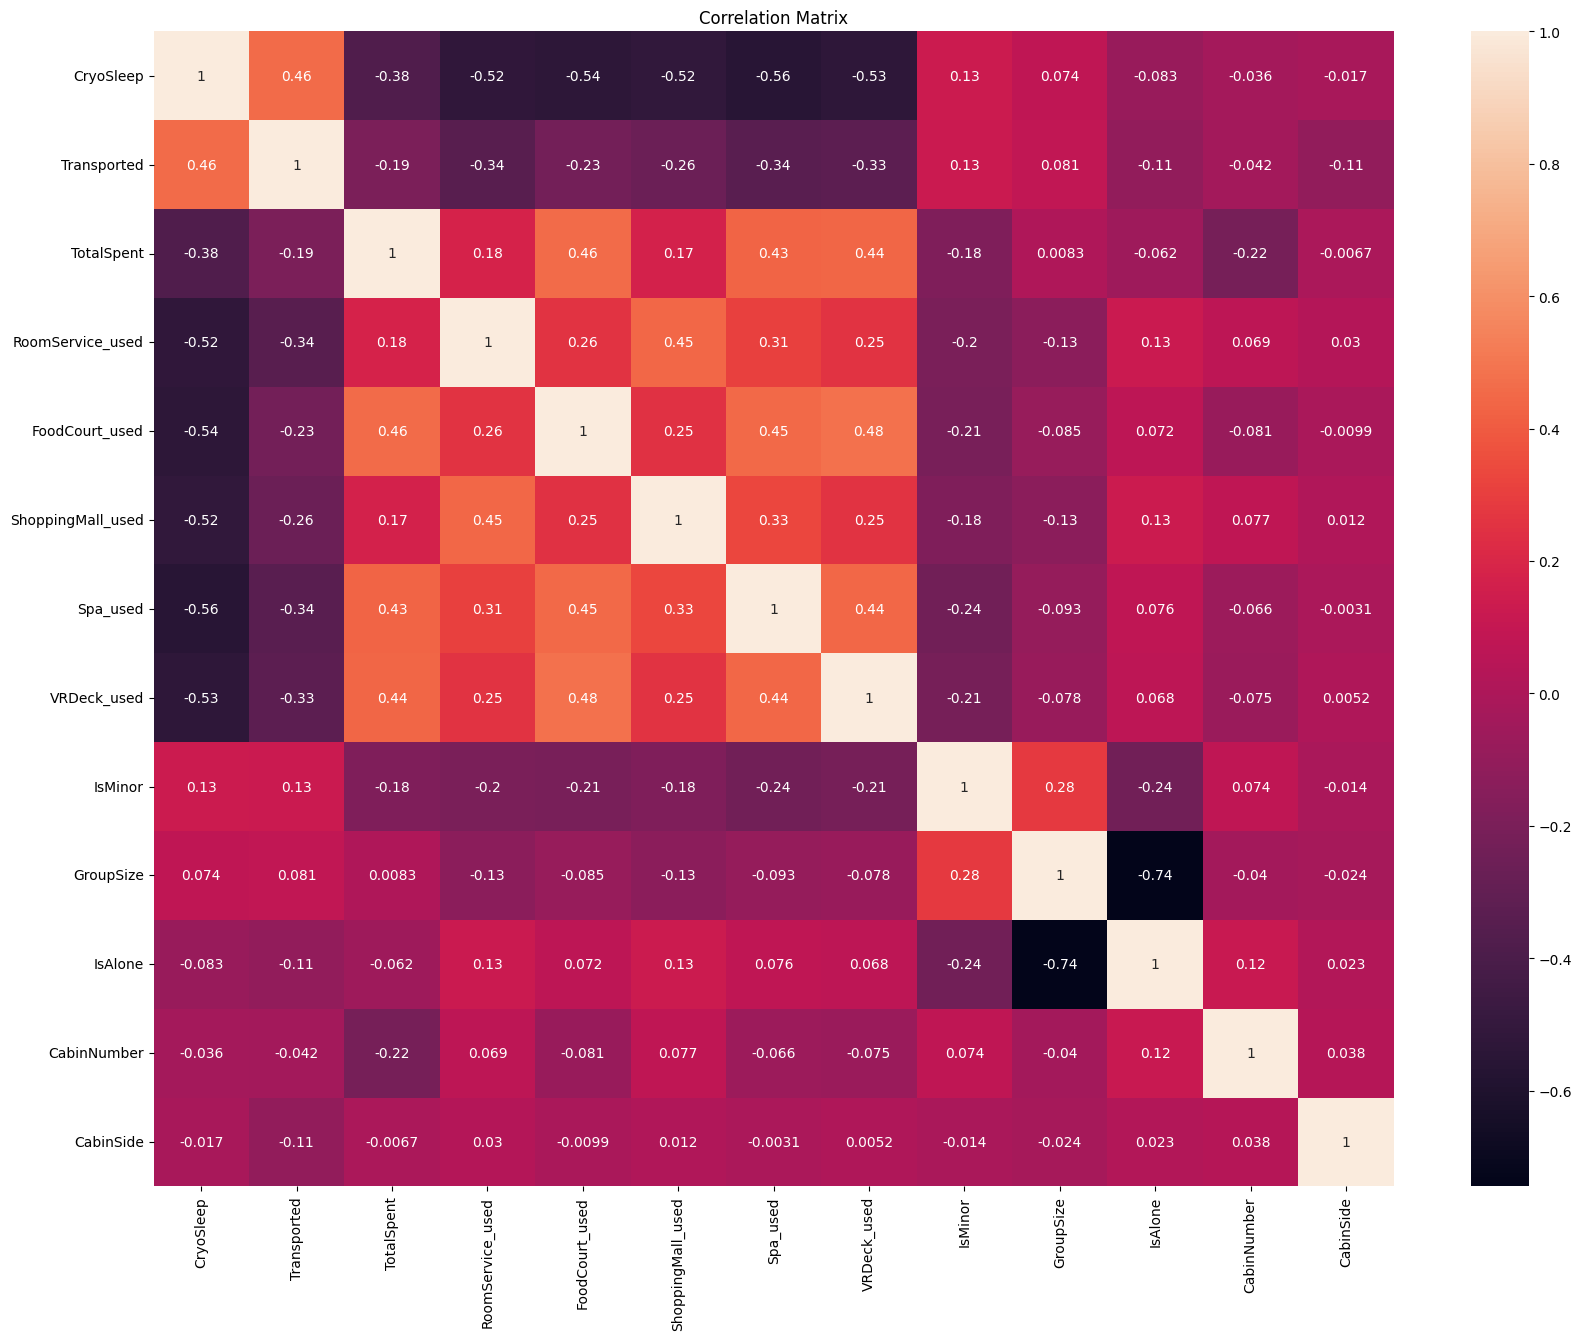

In [216]:
plt.figure(figsize=(20,15)) 
corr = df5.corr(numeric_only=True)  
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix') 
plt.show() 